# **Final ML Group Project**


# **Task 1: Exploratory Data Analysis (EDA)**


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn as sb
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, f1_score, precision_score, recall_score, auc, roc_auc_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay

current_directory = os.getcwd()
file_path = os.path.join(current_directory, 'diabetes_012_health_indicators_BRFSS2015.csv')

df = pd.read_csv(file_path)
df.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
summary = df.describe()
summary

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Text(0, 0.5, 'Count')

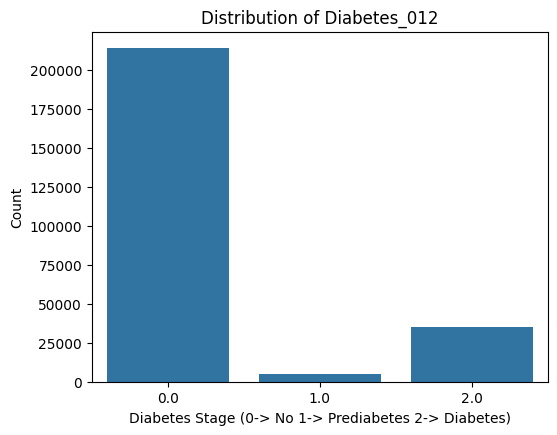

In [ ]:
plt.figure(figsize=(20, 10))
# Target variable distribution
plt.subplot(2, 3, 1)
sns.countplot(x='Diabetes_012', data=df, )
plt.title('Distribution of Diabetes_012')
plt.xlabel('Diabetes Stage (0-> No 1-> Prediabetes 2-> Diabetes)')
plt.ylabel('Count')

Text(0, 0.5, 'BMI')

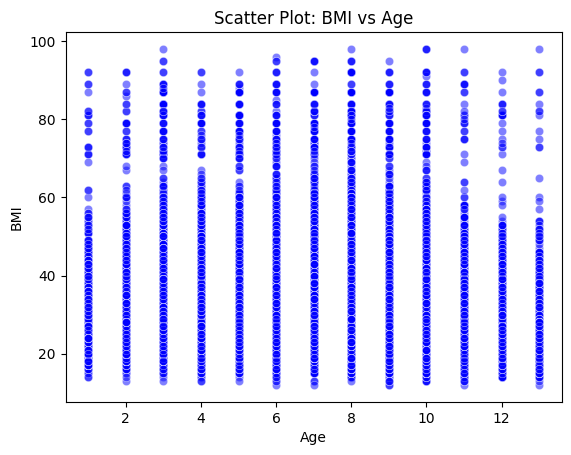

In [ ]:
# Scatter plot-> BMI vs AGE
sns.scatterplot(x='Age', y='BMI', data=df, alpha=0.5, color='blue')
plt.title('Scatter Plot: BMI vs Age')
plt.xlabel('Age')
plt.ylabel('BMI')

Text(0, 0.5, 'Frequency')

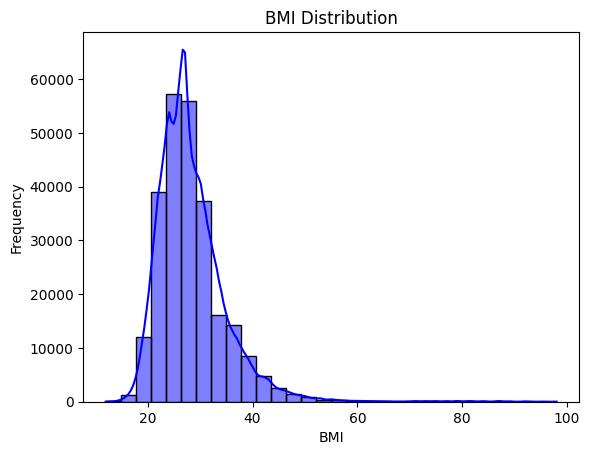

In [ ]:
# Histogram
sns.histplot(df['BMI'], bins=30, kde=True, color='blue')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0, 0.5, 'Count')

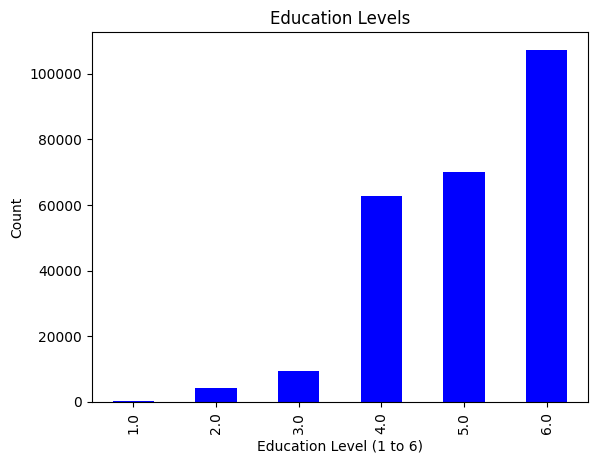

In [ ]:
# Bar chart for Education levels

education_counts = df['Education'].value_counts().sort_index()
education_counts.plot(kind='bar', color='blue')
plt.title('Education Levels')
plt.xlabel('Education Level (1 to 6)')
plt.ylabel('Count')

Text(0.5, 1.0, 'Sex Distribution')

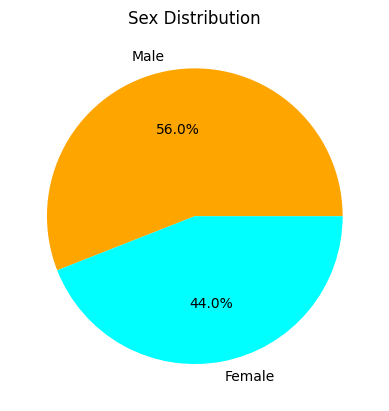

In [ ]:
# Pie chart for Sex
sex_counts = df['Sex'].value_counts()
plt.pie(sex_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['orange', 'aqua'])
plt.title('Sex Distribution')

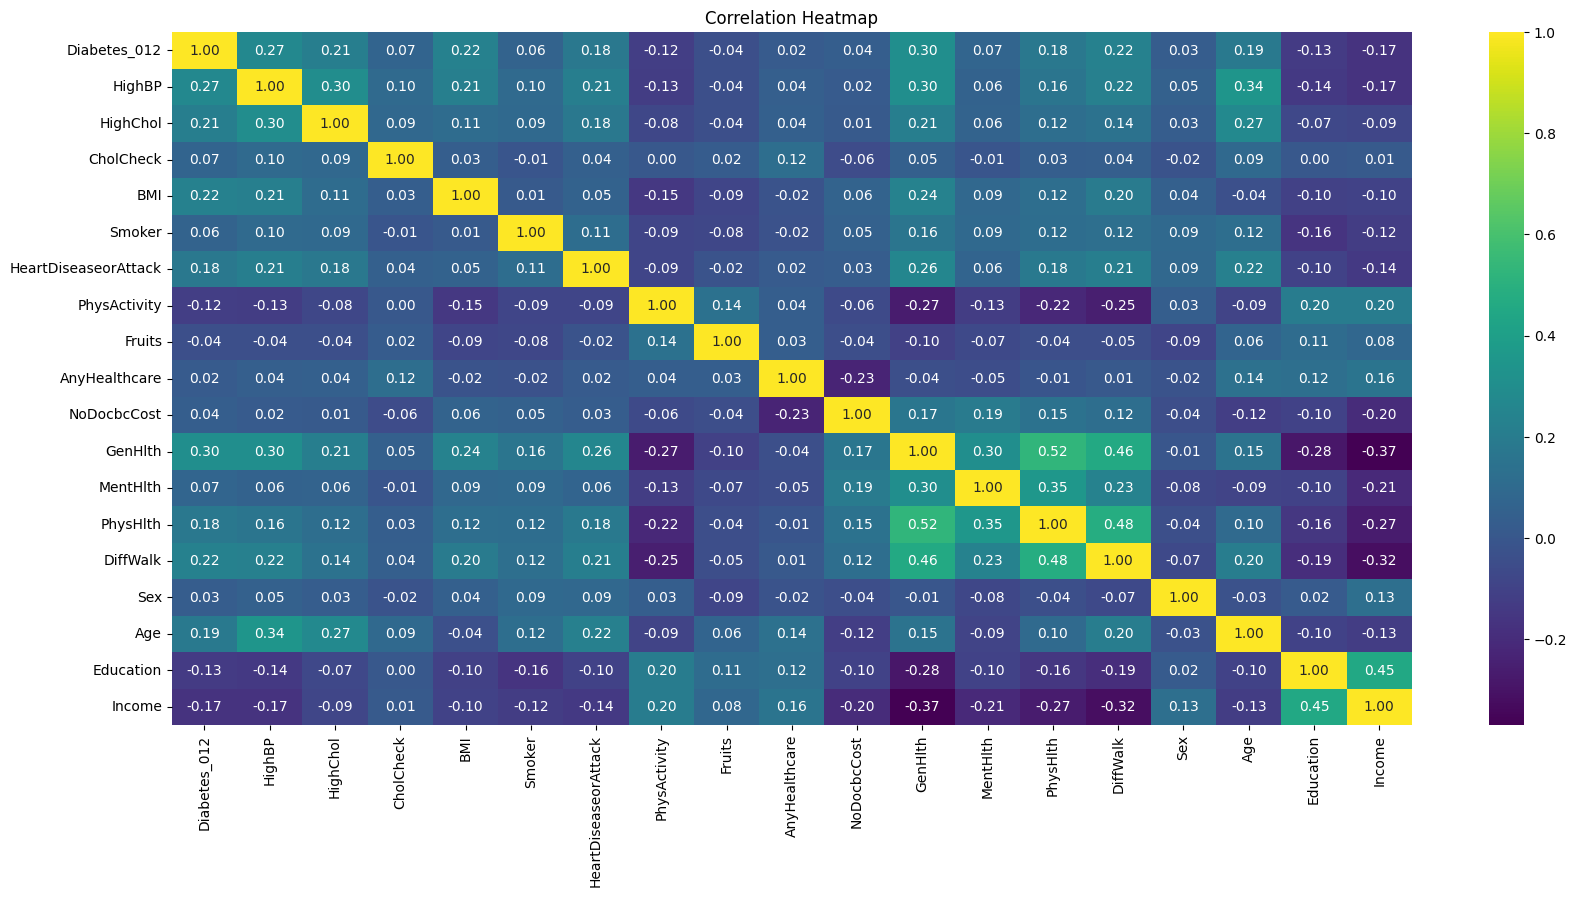

In [ ]:
numerical_cols = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI','Smoker','HeartDiseaseorAttack','PhysActivity','Fruits','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']
heatmap_data = df[numerical_cols]
correlation_matrix = heatmap_data.corr()
# Create the heatmap
plt.figure(figsize=(20, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **Task 2: Data Preprocessing**


**Replace the Null values. Print the total count after and before removing the null values.**


In [ ]:
# Check for null values in the dataset
nullCounts = df.isnull().sum()
dataFilled = df.fillna(df.mean())
print("Before Handling Nulls:")
print(df.isnull().sum())
print("After Handling Nulls:")
nullCountsAfter = dataFilled.isnull().sum()
print(nullCountsAfter)

Before Handling Nulls:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
After Handling Nulls:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlt

**_Plot boxplot and identify outliers._**


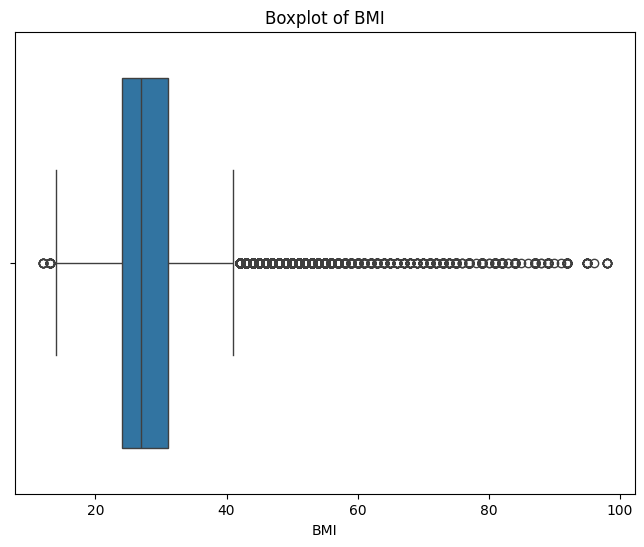

Number of outliers in 'BMI': 9847


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['BMI'])
plt.title('Boxplot of BMI')
plt.show()

#outliers
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]
print(f"Number of outliers in 'BMI': {len(outliers)}")

**_Min-Max Scaling _**


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Select columns to scale
features = df.drop(columns=['Diabetes_012'])
target = df['Diabetes_012']

# Min-Max Scaling
scaler = MinMaxScaler()
scaledFeatures = scaler.fit_transform(features)

# DataFrame
scaledData = pd.DataFrame(scaledFeatures, columns=features.columns)
scaledData['Diabetes_012'] = target

print(scaledData.head())

   HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0     1.0       1.0        1.0  0.325581     1.0     0.0   
1     0.0       0.0        0.0  0.151163     1.0     0.0   
2     1.0       1.0        1.0  0.186047     0.0     0.0   
3     1.0       0.0        1.0  0.174419     0.0     0.0   
4     1.0       1.0        1.0  0.139535     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
0                   0.0           0.0     0.0      1.0  ...          0.0   
1                   0.0           1.0     0.0      0.0  ...          1.0   
2                   0.0           0.0     1.0      0.0  ...          1.0   
3                   0.0           1.0     1.0      1.0  ...          0.0   
4                   0.0           1.0     1.0      1.0  ...          0.0   

   GenHlth  MentHlth  PhysHlth  DiffWalk  Sex       Age  Education    Income  \
0     1.00       0.6       0.5       1.0  0.0  0.666667        0.6  0.285714   
1     0.50       0.0  

**_Check class imbalance issue._**


In [ ]:
classCounts = df['Diabetes_012'].value_counts()
print(classCounts)


Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


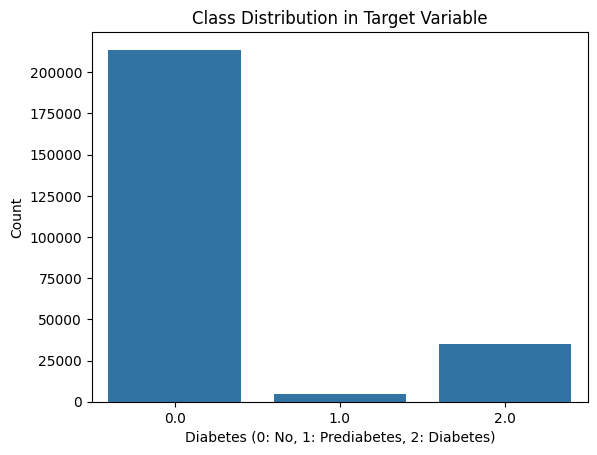

In [ ]:
sns.countplot(x='Diabetes_012', data=df, )
sns.color_palette("Blues", as_cmap=True)
plt.title('Class Distribution in Target Variable')
plt.xlabel('Diabetes (0: No, 1: Prediabetes, 2: Diabetes)')
plt.ylabel('Count')
plt.show()

**Solve the imbalance issue**


In [4]:
from imblearn.over_sampling import RandomOverSampler

# Separate features and target
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine features and target into a new DataFrame
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                            pd.DataFrame(y_resampled, columns=['Diabetes_012'])], axis=1)

# new class distribution check
new_class_distribution = resampled_data['Diabetes_012'].value_counts()
resampled_data.head(), new_class_distribution


(   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
 0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0   
 1     0.0       0.0        0.0  25.0     1.0     0.0                   0.0   
 2     1.0       1.0        1.0  28.0     0.0     0.0                   0.0   
 3     1.0       0.0        1.0  27.0     0.0     0.0                   0.0   
 4     1.0       1.0        1.0  24.0     0.0     0.0                   0.0   
 
    PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
 0           0.0     0.0      1.0  ...          0.0      5.0      18.0   
 1           1.0     0.0      0.0  ...          1.0      3.0       0.0   
 2           0.0     1.0      0.0  ...          1.0      5.0      30.0   
 3           1.0     1.0      1.0  ...          0.0      2.0       0.0   
 4           1.0     1.0      1.0  ...          0.0      2.0       3.0   
 
    PhysHlth  DiffWalk  Sex   Age  Education  Income  Diabetes_012  
 0      1

# Split data into x & y


In [2]:
from sklearn.model_selection import train_test_split

target_name = 'Diabetes_012'
# Separate object for target feature
y = df[target_name]

# Separate object for input feature
x = df.drop(target_name, axis=1)
x.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
y.head()

,Diabetes_012
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


# **Train Test Split data**


In [5]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
171691,1.0,0.0,1.0,37.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,4.0,2.0,6.0,0.0,0.0,13.0,5.0,5.0
357390,0.0,0.0,1.0,31.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,4.0,0.0,1.0,0.0,0.0,7.0,5.0,1.0
263897,1.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,6.0,8.0
516403,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,12.0,6.0,6.0
514073,1.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,30.0,30.0,1.0,0.0,8.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,1.0,1.0,1.0,30.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,4.0,0.0,2.0,1.0,0.0,12.0,5.0,5.0
259178,0.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,15.0,15.0,0.0,1.0,13.0,6.0,8.0
365838,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,3.0,6.0
131932,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,3.0,0.0,0.0,9.0,6.0,8.0


In [ ]:
y_train

,Diabetes_012
171691,0.0
357390,1.0
263897,1.0
516403,2.0
514073,2.0
...,...
110268,2.0
259178,1.0
365838,1.0
131932,0.0


In [ ]:
X_test

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
636124,1.0,0.0,1.0,37.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,14.0,1.0,0.0,11.0,5.0,4.0
419554,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,10.0,1.0,0.0,1.0,5.0,6.0,8.0
309164,0.0,0.0,1.0,50.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,8.0,0.0,0.0,3.0,5.0,6.0
294153,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,6.0,7.0
279102,1.0,1.0,1.0,34.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,4.0,10.0,10.0,1.0,0.0,12.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354653,1.0,1.0,1.0,31.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,4.0,10.0,10.0,1.0,0.0,12.0,5.0,5.0
226458,1.0,1.0,1.0,43.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,1.0,0.0,1.0,7.0,6.0,8.0
546651,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,15.0,1.0,0.0,10.0,4.0,2.0
171764,1.0,1.0,1.0,36.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,10.0,0.0,1.0,9.0,4.0,6.0


In [ ]:
y_test

,Diabetes_012
636124,2.0
419554,1.0
309164,1.0
294153,1.0
279102,1.0
...,...
354653,1.0
226458,2.0
546651,2.0
171764,2.0


# **Different Classification Algorithms**


# Random Forest _Algorithm_


In [ ]:
from sklearn. ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
print("Train Accuracy of Random Forest Algorithm ", rf.score(X_train,y_train)*100)
print("Test Accuracy score of Random Forest Algorithm ", rf.score(X_test,y_test)*100)

Train Accuracy of Random Forest Algorithm  99.36301758477013
Test Accuracy score of Random Forest Algorithm  96.2642916192229


In [ ]:
prediction=rf.predict([[60,3,170,65,120,90,2,2,1,1,3,5,7,30,13,70,20,1,2,1,2]])
if(prediction ==0):
  print("The person has no diabetes")
elif(prediction ==1):
  print("The person has Prediabetes")
else:
  print("The person has diabetes")


The person has diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
prediction=rf.predict([[0, 1, 1, 102, 1, 0, 0, 0, 1, 1, 1,0, 1,3,100,7,1,0,95,6,2]])
if(prediction ==0):
  print("The person has no diabetes")
elif(prediction ==1):
  print("The person has Prediabetes")
else:
  print("The person has diabetes")

The person has no diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Decision Tree Algorithm


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)



DecisionTreeClassifier()

In [ ]:
print("Train Accuracy of Decision Tree Algorithm ", dt.score(X_train,y_train)*100)
print("Test Accuracy score of Decision Tree Algorithm ", dt.score(X_test,y_test)*100)

Train Accuracy of Decision Tree Algorithm  99.36301758477013
Test Accuracy score of Decision Tree Algorithm  94.09071766155573


In [ ]:
prediction=dt.predict([[60,3,170,65,120,90,2,2,1,1,3,5,7,30,13,70,20,1,2,1,2]])
if(prediction ==0):
  print("The person has no diabetes")
elif(prediction ==1):
  print("The person has Prediabetes")
else:
  print("The person has diabetes")

The person has Prediabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Logistic Regression Algorithm


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
print("Train Accuracy of Logistic Regression ", lr.score(X_train,y_train)*100)
print("Test Accuracy score of Logistic Regression ", lr.score(X_test,y_test)*100)

Train Accuracy of Logistic Regression  52.29456001029467
Test Accuracy score of Logistic Regression  52.204769852287434


In [ ]:
prediction=lr.predict([[60,3,170,65,120,90,2,2,1,1,3,5,7,30,13,70,20,1,2,1,2]])
if(prediction ==0):
  print("The person has no diabetes")
elif(prediction ==1):
  print("The person has Prediabetes")
else:
  print("The person has diabetes")

The person has diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# K-Nearest Neighbor(KNN) Algorithm


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print("Train Accuracy of KNN Algorithm ", knn.score(X_train,y_train)*100)
print("Test Accuracy score of KNN Algorithm ", knn.score(X_test,y_test)*100)

Train Accuracy of KNN Algorithm  90.98651359851195
Test Accuracy score of KNN Algorithm  87.06228260360936


In [ ]:
prediction=knn.predict([[60,3,170,65,120,90,2,2,1,1,3,5,7,30,13,70,20,1,2,1,2]])
if(prediction ==0):
  print("The person has no diabetes")
elif(prediction ==1):
  print("The person has Prediabetes")
else:
  print("The person has diabetes")

The person has diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Naive-Bayes Algorithm


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
print("Train Accuracy of Naive-Bayes Algorithm ", nb.score(X_train,y_train)*100)
print("Test Accuracy score of Naive-Bayes Algorithm ", nb.score(X_test,y_test)*100)

Train Accuracy of Naive-Bayes Algorithm  48.90823904680758
Test Accuracy score of Naive-Bayes Algorithm  48.86368953845674


In [ ]:
prediction=nb.predict([[60,3,170,65,120,90,2,2,1,1,3,5,7,30,13,70,20,1,2,1,2]])
if(prediction ==0):
  print("The person has no diabetes")
elif(prediction ==1):
  print("The person has Prediabetes")
else:
  print("The person has diabetes")

The person has no diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
prediction=nb.predict([[0, 1, 1, 102, 1, 0, 0, 0, 1, 1, 1,0, 1,3,100,7,1,0,95,6,2]])
if(prediction ==0):
  print("The person has no diabetes")
elif(prediction ==1):
  print("The person has Prediabetes")
else:
  print("The person has diabetes")

The person has no diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


#Support Vector Machine (SVM)


In [ ]:
from sklearn.impute import SimpleImputer
# Train an SVM classifier
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_imputed, y_train)

In [ ]:
print("Train Accuracy of svm Algorithm ", svm.score(X_train_imputed,y_train)*100)
print("Test Accuracy score of svm Algorithm ", svm.score(X_test_imputed,y_test)*100)

In [ ]:
prediction=svm.predict([[0, 1, 1, 102, 1, 0, 0, 0, 1, 1, 1,0, 1,3,100,7,1,0,95,6,2]])
if(prediction ==0):
  print("The person has no diabetes")
elif(prediction ==1):
  print("The person has Prediabetes")
else:
  print("The person has diabetes")

# Predicitng Outcome


In [ ]:
# Prediction on test using random forest
rf_pred = rf.predict(X_test)

In [ ]:
# Prediction on test using decision tree

dt_pred = dt.predict(X_test)

In [ ]:
# Prediction on test using logistic regression

lr_pred = lr.predict(X_test)

In [ ]:
# Prediction on test using KNN

knn_pred = knn.predict(X_test)

In [ ]:
# Prediction on test using naive bayes

nb_pred = nb.predict(X_test)

In [ ]:
# Prediction on test using SVM

svm_pred=svm.predict(X_test)

# Confusion Matrix


# Random forest algorithm


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, rf_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

In [ ]:
sb.heatmap(confusion_matrix(y_test, rf_pred), annot=True,fmt="d")

# Decision Tree Algorithm


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, dt_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

In [ ]:
sb.heatmap(confusion_matrix(y_test, dt_pred), annot=True,fmt="d")

# Logistic Regretion Algorithm


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, lr_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

In [ ]:
sb.heatmap(confusion_matrix(y_test, lr_pred), annot=True,fmt="d")

# K-Nearest Neighbor(KNN) Algorithm


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, knn_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

In [ ]:
sb.heatmap(confusion_matrix(y_test, knn_pred), annot=True,fmt="d")

# Naive-Bayes Algorithm


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, nb_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

In [ ]:
sb.heatmap(confusion_matrix(y_test, nb_pred), annot=True,fmt="d")

# SVM


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
svm_pred_discrete = np.round(svm_pred)
cm = confusion_matrix(y_test, svm_pred_discrete)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

sb.heatmap(confusion_matrix(y_test, svm_pred_discrete), annot=True,fmt="d")

**Calculate The MSE,MAE,RMSE,R2**


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score, f1_score, precision_score, recall_score,auc,roc_auc_score,confusion_matrix,roc_curve,ConfusionMatrixDisplay


_For Random forest model_


In [ ]:
print("For Random forest model:")
y_pred = rf.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred)
mae1 = mean_absolute_error(y_test, y_pred)
rmse1 = np.sqrt(mse1)
r1 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse1}")
print(f"Mean Absolute Error: {mae1}")
print(f"Root Mean Squared Error: {rmse1}")
print(f"R² Score: {r1}")

_Decision Tree._


In [ ]:
print("For Decision tree:")
y_pred = dt.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred)
mae2 = mean_absolute_error(y_test, y_pred)
rmse2 = np.sqrt(mse2)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse2}")
print(f"Mean Absolute Error: {mae2}")
print(f"Root Mean Squared Error: {rmse2}")
print(f"R² Score: {r2}")

_Logistic Regression_


In [ ]:
print("For Logistic Regression:")
y_pred = lr.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred)
mae3 = mean_absolute_error(y_test, y_pred)
rmse3 = np.sqrt(mse3)
r3 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse3}")
print(f"Mean Absolute Error: {mae3}")
print(f"Root Mean Squared Error: {rmse3}")
print(f"R² Score: {r3}")

_K-Nearest Neighbor(KNN)_


In [ ]:
print("For K-Nearest Neighbor(KNN):")
y_pred = knn.predict(X_test)
mse4 = mean_squared_error(y_test, y_pred)
mae4 = mean_absolute_error(y_test, y_pred)
rmse4 = np.sqrt(mse4)
r4 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse4}")
print(f"Mean Absolute Error: {mae4}")
print(f"Root Mean Squared Error: {rmse4}")
print(f"R² Score: {r4}")

_Naive Bayes_


In [ ]:
print("For Naive Bayes:")
y_pred = nb.predict(X_test)
mse5 = mean_squared_error(y_test, y_pred)
mae5 = mean_absolute_error(y_test, y_pred)
rmse5 = np.sqrt(mse5)
r5 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse5}")
print(f"Mean Absolute Error: {mae5}")
print(f"Root Mean Squared Error: {rmse5}")
print(f"R² Score: {r5}")

_support vector machine_


In [ ]:
print("For SVM:")
y_pred = svm.predict(X_test)
mse6 = mean_squared_error(y_test, y_pred)
mae6 = mean_absolute_error(y_test, y_pred)
rmse6 = np.sqrt(mse6)
r6 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse6}")
print(f"Mean Absolute Error: {mae6}")
print(f"Root Mean Squared Error: {rmse6}")
print(f"R² Score: {r6}")

# Compare Between All Model


In [ ]:
compare = pd.DataFrame({
    'Model': ['Random forest', 'Decision Tree','Logistic Regression', 'K-Nearest Neighbor','Naive Bayes', 'SVM'],
    'MSE': [mse1, mse2,mse3, mse4,mse5,mse6],
    'MAE': [mae1, mae2,mae3, mae4,mae5, mae6],
    'RMSE': [rmse1, rmse2,rmse3, rmse4,rmse5, rmse6],
    'R2': [r1, r2,r3, r4, r5,r6]
})

compare = compare.sort_values(by='R2', ascending=False)
compare